In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

Vamos a trabajar con un dataset información de distintos modelos de autos

El dataset contiene las siguientes variables:

* **mpg**: millas por galon
* **cylinders**: cantidad de cilindros
* **displacement**: cilindrada (volumen util de los cilindros)
* **horsepower**: caballos de fuerza
* **weight**: peso
* **acceleration**: aceleración
* **model_year**: año del modelo
* **origin**: país de origen
* **name**:nombre del modelo

In [2]:
# Cargamos el dataset desde el link
autos = sns.load_dataset('mpg')
# Vemos 10 registros al azar
autos.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
150,26.00000,4,108.00000,93.00000,2391,15.50000,74,japan,subaru
357,32.90000,4,119.00000,100.00000,2615,14.80000,81,japan,datsun 200sx
233,29.00000,4,97.00000,78.00000,1940,14.50000,77,europe,volkswagen rabbit custom
365,20.20000,6,200.00000,88.00000,3060,17.10000,81,usa,ford granada gl
252,19.20000,6,231.00000,105.00000,3535,19.20000,78,usa,pontiac phoenix lj
62,13.00000,8,350.00000,165.00000,4274,12.00000,72,usa,chevrolet impala
268,27.20000,4,119.00000,97.00000,2300,14.70000,78,japan,datsun 510
341,23.50000,6,173.00000,110.00000,2725,12.60000,81,usa,chevrolet citation
254,20.20000,6,200.00000,85.00000,2965,15.80000,78,usa,ford fairmont (auto)
105,13.00000,8,360.00000,170.00000,4654,13.00000,73,usa,plymouth custom suburb


In [3]:
# Cantidad de registros
autos.shape

(398, 9)

# 2. Objetivo: detectar autos atípicos

Nuestro cliente es una concesionaria que se especializa en autos antiguos y quiere saber cuales de estos autos son atípicos en las variables de mpg, horsepower, weight y acceleration

In [4]:
# Variables relevantes
lista_variables = ['mpg', 'horsepower', 'weight' , 'acceleration']

## 2.1 Escala de las variables

Evaluemos la escala de las variables y su distribución

Primero, observemos los estadísticos descriptivos de las variables

In [5]:
# Observar la distribución de las variables
autos[lista_variables].describe()

,mpg,horsepower,weight,acceleration
count,398.00000,392.00000,398.00000,398.00000
mean,23.51457,104.46939,2970.42462,15.56809
std,7.81598,38.49116,846.84177,2.75769
min,9.00000,46.00000,1613.00000,8.00000
25%,17.50000,75.00000,2223.75000,13.82500
50%,23.00000,93.50000,2803.50000,15.50000
75%,29.00000,126.00000,3608.00000,17.17500
max,46.60000,230.00000,5140.00000,24.80000


¿Qué observamos con estos datos?

Son todas variables que se miden en unidades distintas. Las variables de peso y caballos de fuerza parecen tener un rango bastante amplio.



# 3. Detección de outliers univariados

El método para detectar outliers que hemos visto consiste en estandarizar la variable y catalogar como outlier a aquellas observaciones cuyo z-score que superen, en valor absoluto, un límite (usualmente de 3).

Entonces el primer paso será estandarizar las variables con la fórmula:

$ x_e = \frac{x-\overline{X}}{\sigma_X}$


In [6]:
# Funcion para estandarizar
def estandarizar_var(X):
  promedio = np.mean(X)
  desvio = np.std(X)
  X_estandarizada = (X-promedio)/desvio
  return X_estandarizada

In [11]:
#Aplicar la función sobre las variables 
autos_estandar = autos.loc[:,lista_variables].apply(estandarizar_var)
autos_estandar.insert(0, 'model_year', autos['model_year'])
autos_estandar.insert(0, 'name', autos['name'])

autos_estandar.sample(10)

,name,model_year,mpg,horsepower,weight,acceleration
31,toyota corona,71,0.19029,-0.24633,-0.87780,-0.56934
331,subaru dl,80,1.31760,-0.97470,-0.97594,0.88298
241,datsun 810,77,-0.19402,-0.19430,-0.18377,-0.38780
26,chevy c20,70,-1.73127,2.48506,1.66187,-0.20626
91,chevrolet caprice classic,73,-1.34696,1.18440,1.76592,-1.29550
318,toyota corona liftback,80,0.80519,-0.37639,-0.30673,-0.02472
226,buick skylark,77,-0.38618,0.01380,0.53746,0.48359
204,datsun b-210,76,1.08702,-0.89666,-1.15920,0.51990
367,chevrolet cavalier,82,0.57460,-0.42842,-0.43206,1.46390
391,dodge charger 2.2,82,1.59943,-0.53247,-0.70991,-0.93242


## 3.1 Gráficos

Realizamos los histogramas de las variables para observar su distribución

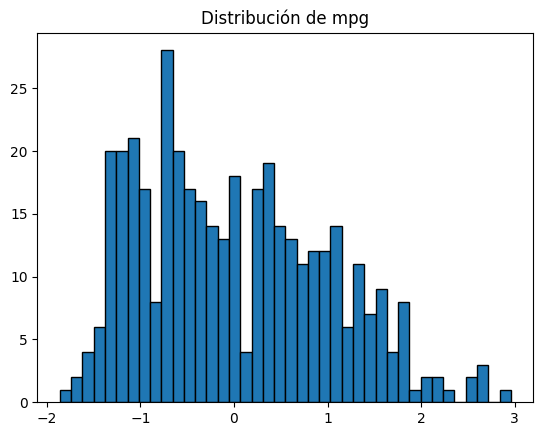

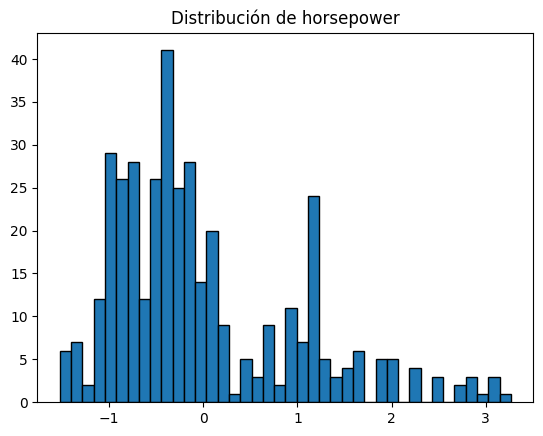

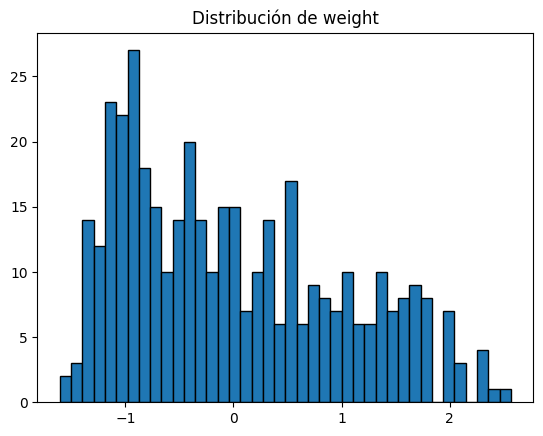

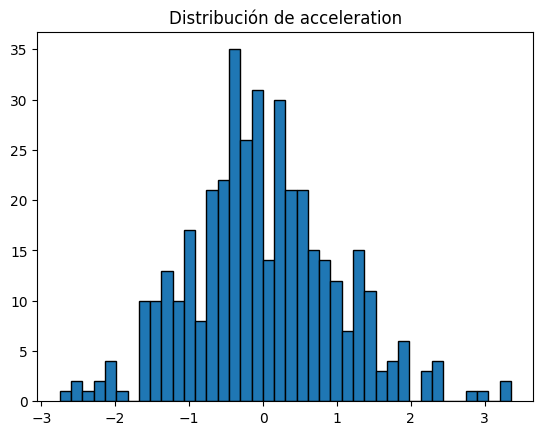

In [12]:
# Realizamos un loop sobre las variables

  # Histograma de la variable

  # Titulo del gráfico
for variable in lista_variables:
  # Histograma de la variable
  plt.hist(autos_estandar[variable], bins=40, ec='black')
  # Titulo del gráfico
  plt.title(f"Distribución de {variable}")
  plt.show()


¿Qué observamos en estos gráficos?

La variable de aceleración tiene una distribución que se aproxima a una normal, las otras 3 variables no parecen aproximarse mucho a distribuciones normales. 

## 3.2 Criterio analitico

El cliente considera que para detectar autos atipicos en determinadas variables debe usarse un valor de 2.5.

Ahora hay que proceder a detectar cuáles autos son outliers en estas 4 variables. El resultado que se presenta debe incluir el nombre/modelo del auto y el valor real de la variable analizada (no el valor estandarizado)

In [13]:
# Función para detectar outliers
def detectar_outliers(df_estandarizado, valor_limite, variable):
  outliers = df_estandarizado.loc[np.abs(df_estandarizado[variable]) > valor_limite, 'name'].to_list()
  return outliers

In [14]:
# Función para devolver el auto con el valor de la variable
def detectar_outliers_estadisticas(df, df_estandarizado, valor_limite, variable):
  outliers = detectar_outliers(df_estandarizado, valor_limite, variable)
  df_outliers = df.loc[df['name'].isin(outliers), ['name', variable]]
  return df_outliers

Detección de los outliers

In [17]:
# Outliers de mpg
detectar_outliers_estadisticas(autos,autos_estandar,2.5,'mpg').sort_values(by = 'mpg',ascending = False)

,name,mpg
322,mazda glc,46.60000
329,honda civic 1500 gl,44.60000
325,vw rabbit c (diesel),44.30000
394,vw pickup,44.00000
326,vw dasher (diesel),43.40000
244,volkswagen rabbit custom diesel,43.10000


In [18]:
# Outliers de acceleration
detectar_outliers_estadisticas(autos, autos_estandar, 2.5, 'acceleration').sort_values(by = 'acceleration',ascending = False)

,name,acceleration
299,peugeot 504,24.80000
394,vw pickup,24.60000
326,vw dasher (diesel),23.70000
59,volkswagen type 3,23.50000
209,peugeot 504,21.90000
20,peugeot 504,17.50000
178,peugeot 504,17.00000
64,plymouth fury iii,13.50000
41,plymouth fury iii,13.00000
7,plymouth fury iii,8.50000


In [19]:
# Outliers de horsepower
detectar_outliers_estadisticas(autos, autos_estandar, 2.5, 'horsepower').sort_values(
    by='horsepower', ascending=False)

,name,horsepower
116,pontiac grand prix,230.00000
8,pontiac catalina,225.00000
13,buick estate wagon (sw),225.00000
95,buick electra 225 custom,225.00000
6,chevrolet impala,220.00000
25,ford f250,215.00000
94,chrysler new yorker brougham,215.00000
7,plymouth fury iii,215.00000
27,dodge d200,210.00000
67,mercury marquis,208.00000


In [20]:
# Outliers de weight
detectar_outliers_estadisticas(autos, autos_estandar, 2.5, 'weight').sort_values(
    by='weight', ascending=False)

,name,weight
44,pontiac safari (sw),5140


# Opcional - Realizar un analisis multivariado

Buscar dos variables y realizar un analisis multivariado cruzando las dos variables y detectando los outliers de cada grupo!

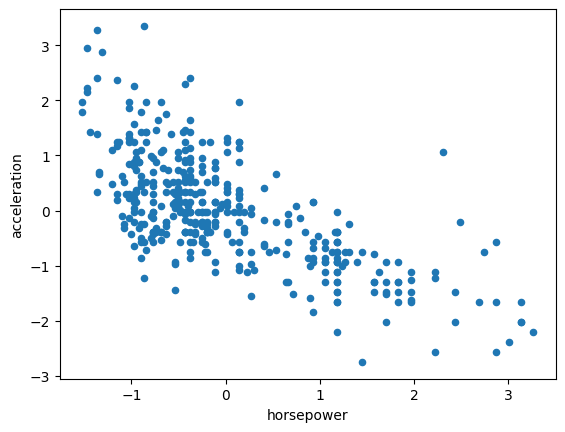

In [22]:
# Analizamos horsepower y acceleration
autos_estandar.plot.scatter(x='horsepower', y='acceleration')
plt.show()

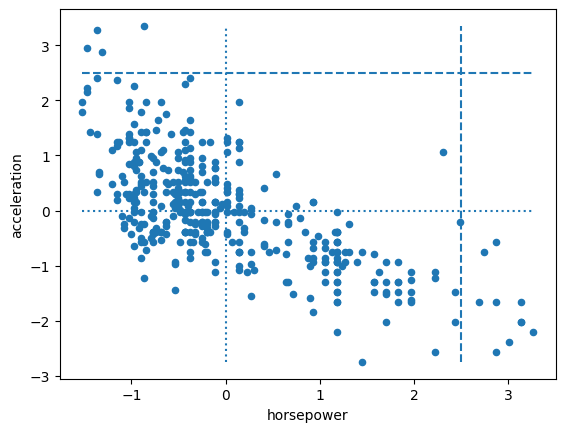

In [27]:
autos_estandar.plot.scatter(x='horsepower', y='acceleration')
plt.vlines(x=2.5, ymin=autos_estandar.acceleration.min(), ymax=autos_estandar.acceleration.max(), linestyles='dashed')
plt.hlines(y=2.5, xmin=autos_estandar.horsepower.min(), xmax=autos_estandar.horsepower.max(), linestyles='dashed')
plt.vlines(x=0, ymin=autos_estandar.acceleration.min(),
           ymax=autos_estandar.acceleration.max(), linestyles='dotted')
plt.hlines(y=0, xmin=autos_estandar.horsepower.min(),
           xmax=autos_estandar.horsepower.max(), linestyles='dotted')
plt.show()
# Mi conclusion seria que por ejemplo no hay modelos de autos que sean outliers a la vez segun caballos de fuerza y aceleracion

In [29]:
# Jugadores con outliers en ambas variables
autos_estandar.query("horsepower > 2.5 & acceleration > 2.5")['name']
# Mi conclusion seria que por ejemplo no hay modelos de autos que sean outliers a la vez segun caballos de fuerza y aceleracion

Series([], Name: name, dtype: object)